IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score,confusion_matrix,precision_score,f1_score,accuracy_score,classification_report

LOAD DATASET

In [3]:
data = pd.read_csv('Customer-Churn.csv')

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.shape

(7043, 21)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

VISUALIZING THE MISSING VALUES

<Axes: >

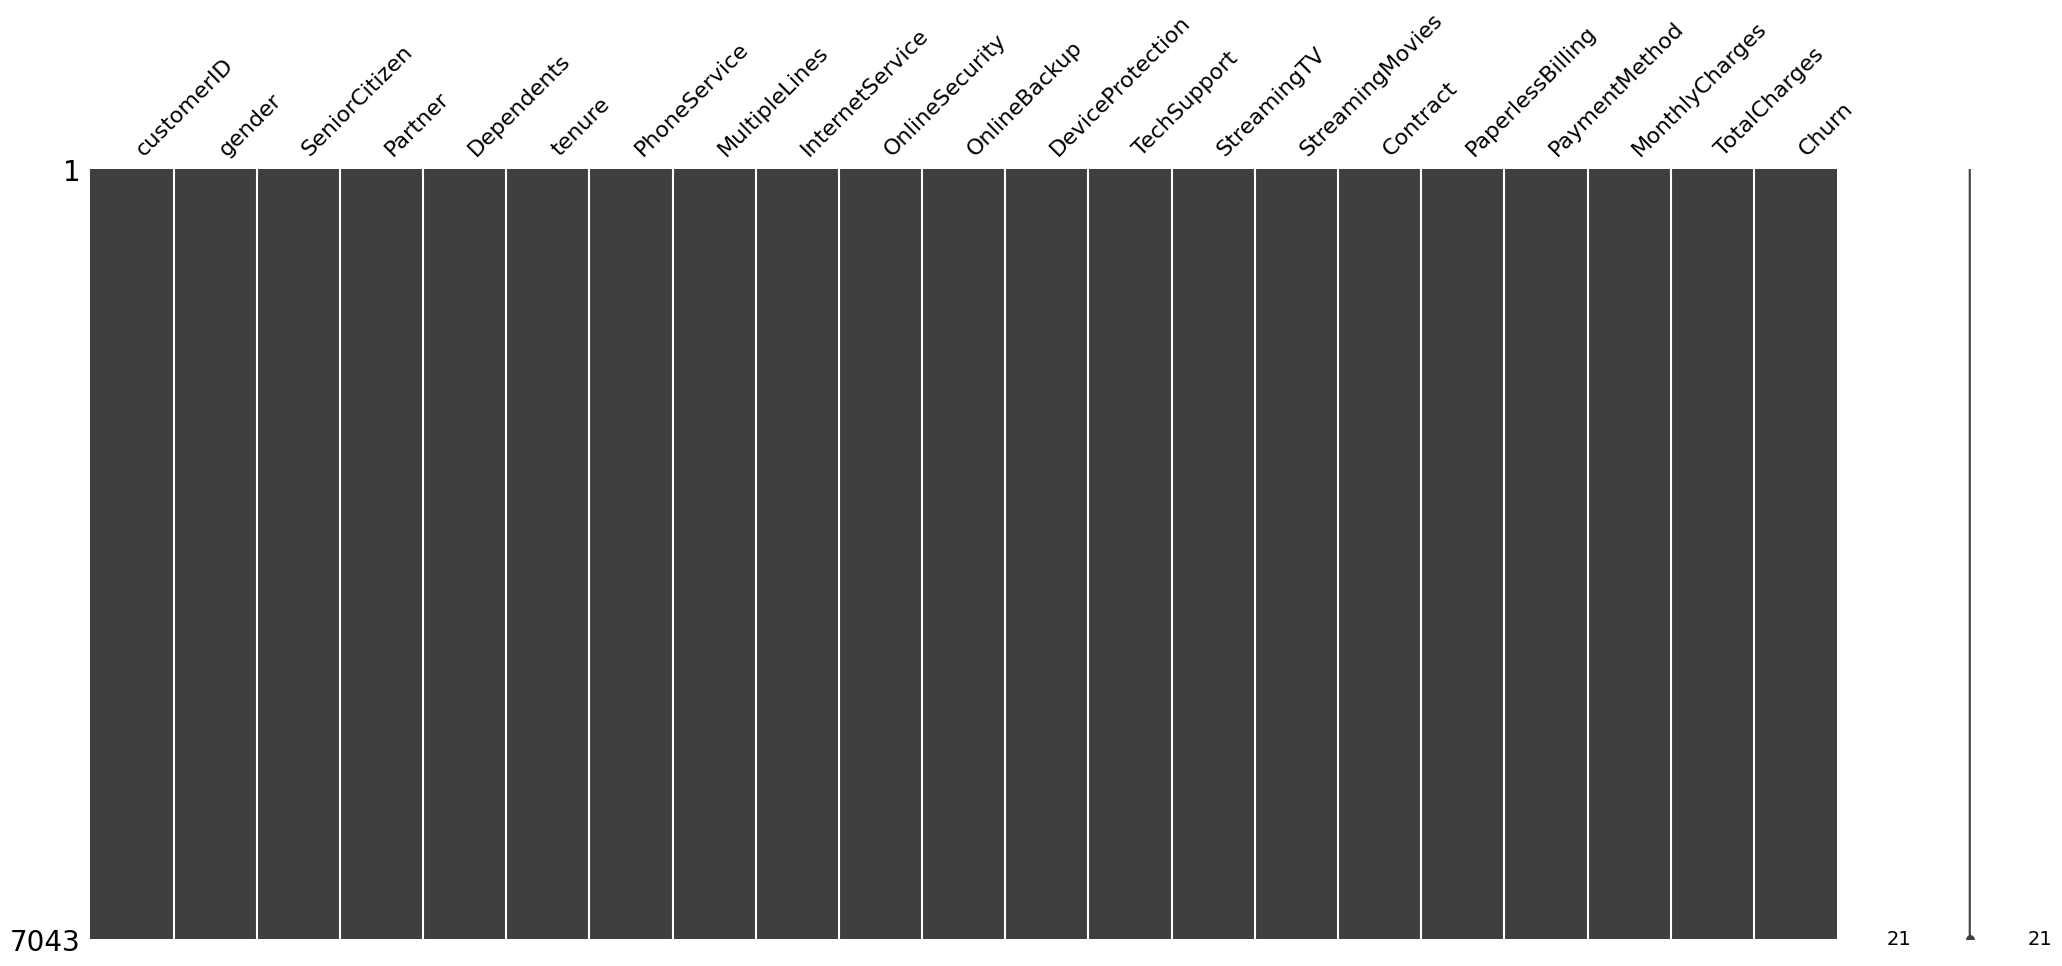

In [8]:
# visualize missing values as matrix
msno.matrix(data)

DATA MANIPULATION

In [9]:
data = data.drop(['customerID'],axis=1)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
data['TotalCharges'] = pd.to_numeric(data.TotalCharges,errors='coerce')
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
data[np.isnan(data['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [12]:
data[data['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [13]:
data.drop(labels=data[data['tenure'] == 0].index,axis=0,inplace=True)
data[data['tenure']==0].index

Index([], dtype='int64')

In [14]:
data.fillna(data['TotalCharges'].mean())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [15]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
data['SeniorCitizen'] = data['SeniorCitizen'].map({0:"NO",1:"YES"})
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,NO,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,NO,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,NO,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,NO,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,NO,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
data['InternetService'].describe(include=['object','bool'])

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

In [18]:
numerical_cols = ['tenure','MonthlyCharges','TotalCharges']
data[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


DATA VISUALIZATION

In [19]:
g_labels = ['Male','Female']
c_labels = ['No','Yes']

fig = make_subplots(rows=1,cols=2,specs=[[{'type':'domain'},{'type':'domain'}]])
fig.add_trace(go.Pie(labels = g_labels, values = data['gender'].value_counts(),name = "Gender"),1,1)
fig.add_trace(go.Pie(labels = c_labels, values = data['Churn'].value_counts(),name = "churn"),1,2)
fig.update_traces(hole=.4,hoverinfo = "label+percent+name",textfont_size = 16)
fig.update_layout(
    title_text = "Gender and Churn Distributions",
    annotations = [dict(text='Gender',x=0.16 , y=0.5,font_size=20,showarrow=False),
                   dict(text='Churn',x=0.84 , y=0.5,font_size=20,showarrow=False)])
# fig.show()

In [20]:
data["Churn"][data["Churn"]=="No"].groupby(by=data["gender"]).count()

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [21]:
data["Churn"][data["Churn"]=="Yes"].groupby(by=data["gender"]).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

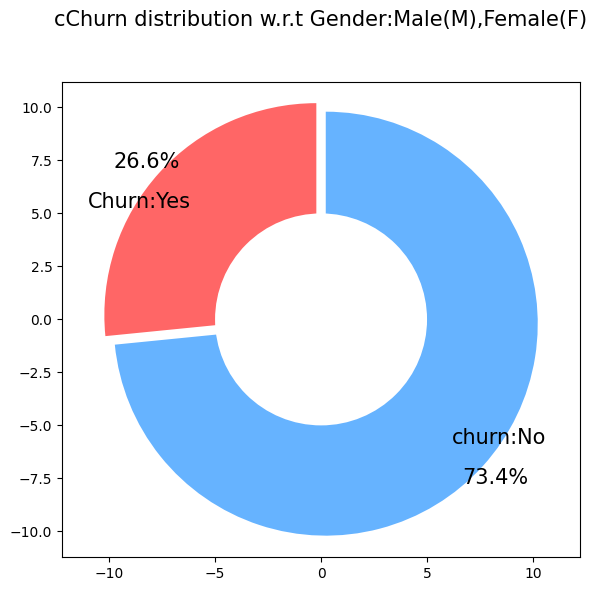

In [22]:
plt.figure(figsize=(6,6))
labels = ["Churn:Yes","churn:No"]
values = [1869,5163]
labels_gender = ["F","F","M","F"]
sizes_gender = [939,930,2544,2619]
colors = ['#ff6666','#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6','#c2c2f0','#ffb3e6']
explode = (0.3,0.3)
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
plt.pie(values,labels=labels,autopct='%1.1f%%',pctdistance=1.08,labeldistance=0.8,colors=colors,startangle=90,frame=True,explode=explode,radius=10,textprops=textprops,counterclock=True)
center_circle = plt.Circle((0,0),5,color='black',fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title('cChurn distribution w.r.t Gender:Male(M),Female(F)',fontsize=15,y=1.1)
plt.axis('equal')
plt.tight_layout()
plt.show()


                 

There is negligible difference in customer percentage/ count who changed the service provider. Both genders behaved in similar fashion when it comes to migrating to another service provider/firm.

In [23]:
fig = px.histogram(data,x="Churn",color = "Contract",barmode="group",title="<b>Customer contract distribution<b>")
fig.update_layout(width=700,height=500,bargap=0.1)
fig.show()

About 75% of customer with Month-to-Month Contract opted to move out as compared to 13% of customrs with One Year Contract and 3% with Two Year Contract

In [24]:
labels = data['PaymentMethod'].unique()
values = data['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels,values=values,hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

In [25]:
fig = px.histogram(data,x="Churn",color="PaymentMethod",title = "<b>Customer Payment Method distribution w.r.t Churn</b>")
fig.update_layout(width=700,height=500,bargap=0.1)
fig.show()

In [26]:
data["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [27]:
data[data["gender"]=="Male"][["InternetService","Churn"]].value_counts()

InternetService  Churn
DSL              No       992
Fiber optic      No       910
No               No       717
Fiber optic      Yes      633
DSL              Yes      240
No               Yes       57
Name: count, dtype: int64

In [28]:
data[data["gender"]=="Female"][["InternetService","Churn"]].value_counts()

InternetService  Churn
DSL              No       965
Fiber optic      No       889
No               No       690
Fiber optic      Yes      664
DSL              Yes      219
No               Yes       56
Name: count, dtype: int64

In [29]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x = [['Churn:No','Churn:No','Churn:Yes','Churn:Yes'],
         ["Female","Male","Female","Male"]],
    y = [965,992,219,240],
    name='DSL',
))

fig.add_trace(go.Bar(
    x = [['Churn:No','Churn:No','Churn:Yes','Churn:Yes'],
         ["Female","Male","Female","Male"]],
    y = [889,910,664,633],
    name='Fiber optic',
))

fig.add_trace(go.Bar(
    x = [['Churn:No','Churn:No','Churn:Yes','Churn:Yes'],
         ["Female","Male","Female","Male"]],
    y = [690,717,56,57],
    name='No Internet',
))
fig.update_layout(title_text = "<b>Churn distribution w.r.t.Internet Service and Gender,/b>")
fig.show()

A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service.
Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service.

In [30]:
color_map = {"Yes":"#FF97FF","No":"#AB63FA"}
fig = px.histogram(data,x="Churn",color="Dependents",barmode="group",title="<b>Dependents dsitribution</b>",color_discrete_map=color_map)
fig.update_layout(width=700,height=500,bargap=0.1)
fig.show()

In [31]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(data, x="Churn", color="Partner", barmode="group", title="<b>Chrun distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [32]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(data, x="Churn", color="SeniorCitizen", title="<b>Chrun distribution w.r.t. SeniorCitizen</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

It can be observed that the fraction of senior citizen is very less.
Most of the senior citizens churn.

In [33]:
color_map = {"Yes": '#FF97FF', "No": '#AB63FA'}
fig = px.histogram(data, x="Churn", color="OnlineSecurity",barmode="group", title="<b>Chrun distribution w.r.t. Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [34]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(data, x="Churn", color="PaperlessBilling", title="<b>Chrun distribution w.r.t. Paper less Billing</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [35]:
# color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(data, x="Churn", color="TechSupport",barmode="group", title="<b>Chrun distribution w.r.t. TechSupport</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [36]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(data, x="Churn", color="PhoneService", title="<b>Chrun distribution w.r.t. PhoneService</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

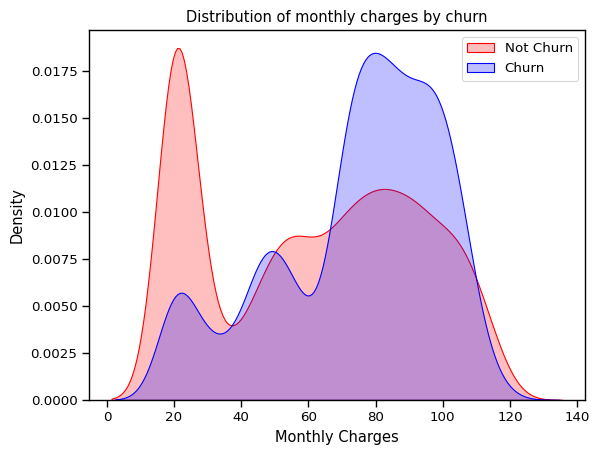

In [37]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"]=='No')],
                 color="Red",shade=True)
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"]=="Yes")],
                 ax=ax,color="Blue",shade=True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')


Text(0.5, 1.0, 'Distribution of total charges by churn')

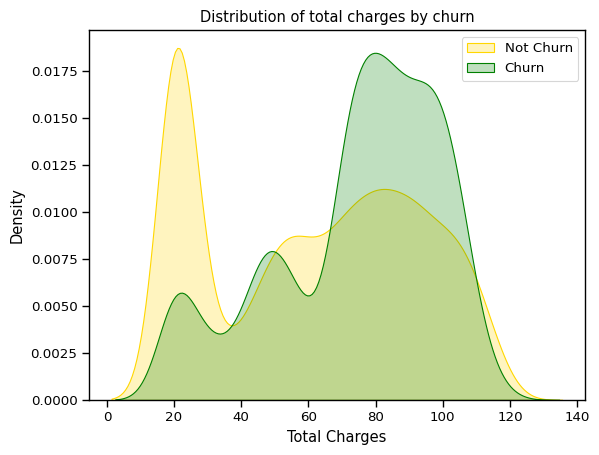

In [38]:
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"]=='No')],
                 color="Gold",shade=True)
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"]=="Yes")],
                 ax=ax,color="Green",shade=True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

In [39]:
fig = px.box(data,x="Churn",y="tenure")
fig.update_yaxes(title_text='tenure(Months)',row=1,col=1)
fig.update_xaxes(title_text='Churn',row=1,col=1)
fig.update_layout(autosize=True,width=750,height=600,
                  title_font=dict(size=25,family='Courier'),
                  title = '<b>tenure vs Churn </b>')
fig.show()


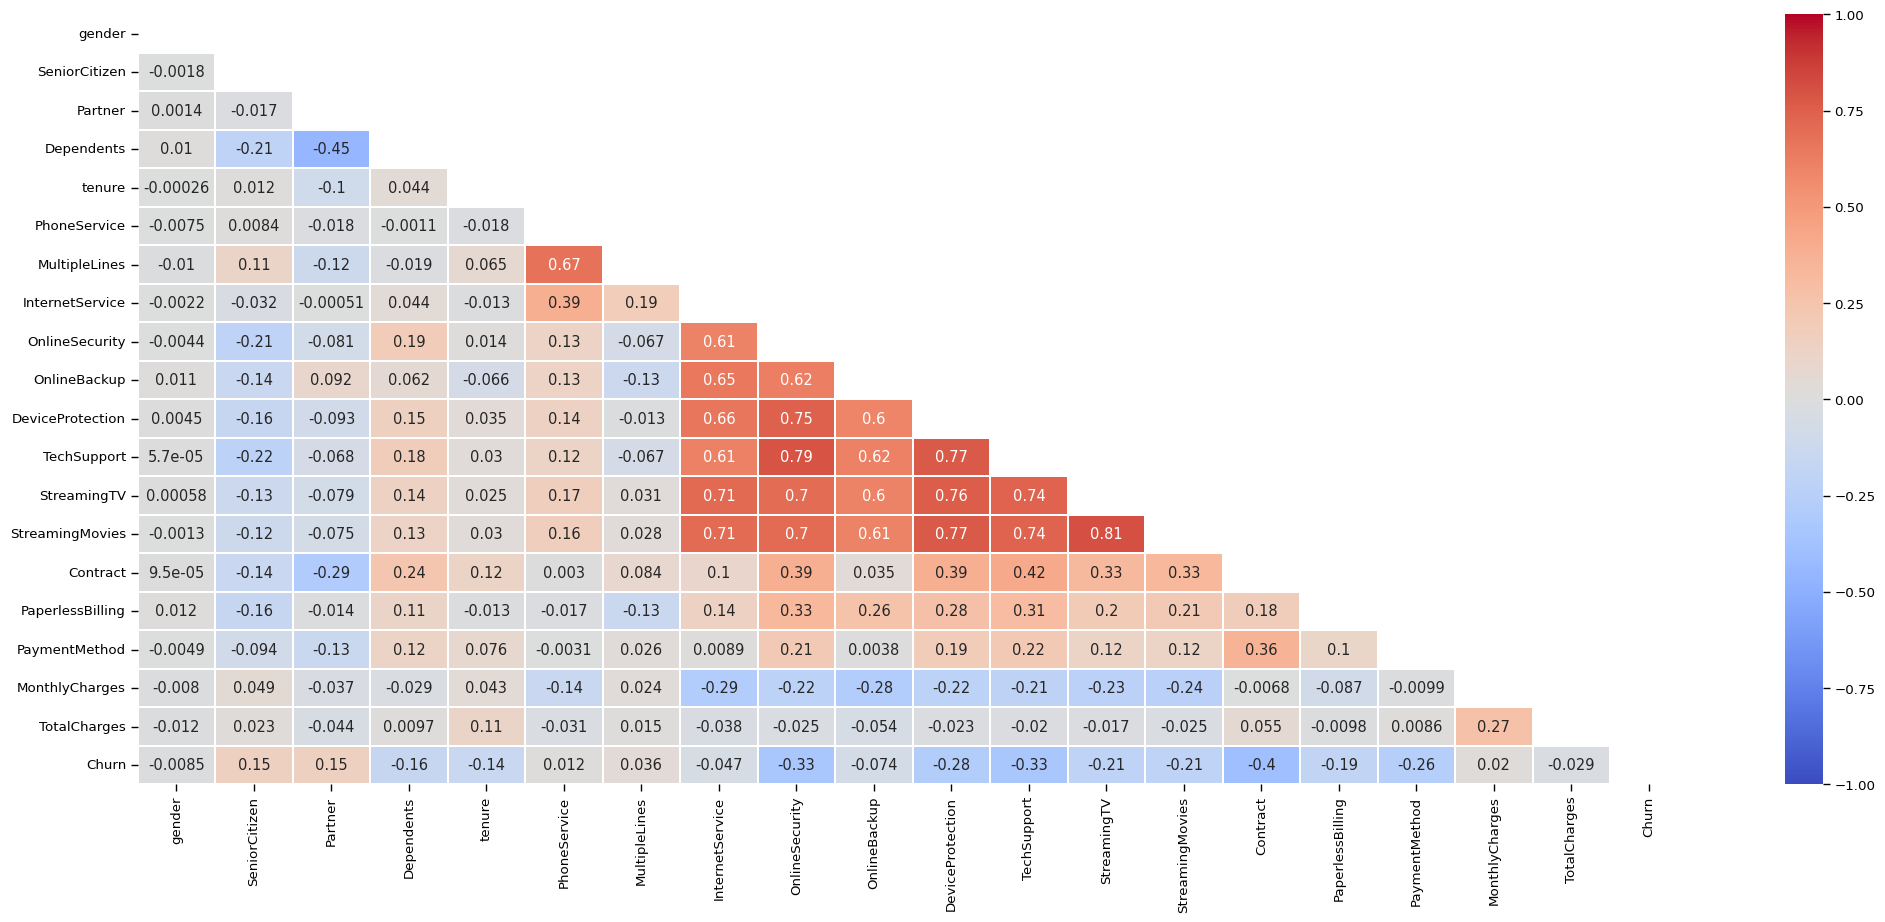

In [40]:
plt.figure(figsize=(25, 10))

corr = data.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

DATA PREPROCESSING

In [41]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [42]:
data = data.apply(lambda x:object_to_int(x))
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [43]:
plt.figure(figsize=(14,7))
data.corr()['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

<Figure size 1400x700 with 0 Axes>

In [44]:
x = data.drop(columns=["Churn"])
y = data['Churn'].values

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=40,stratify=y)

In [46]:
def disptlot(feature,frame,color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature],color=color)

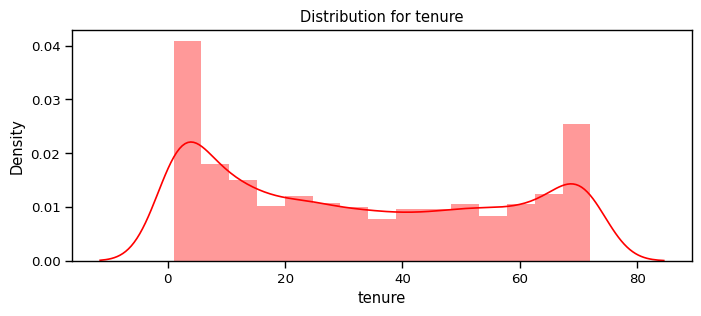

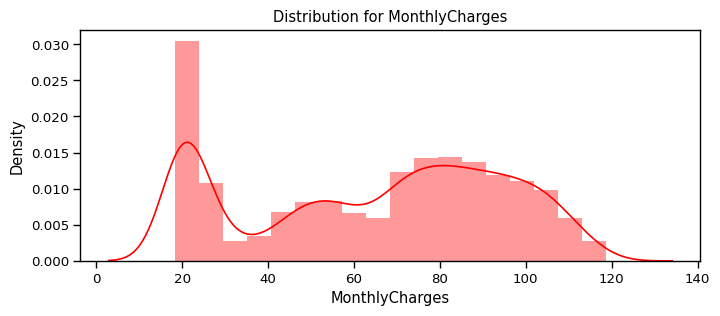

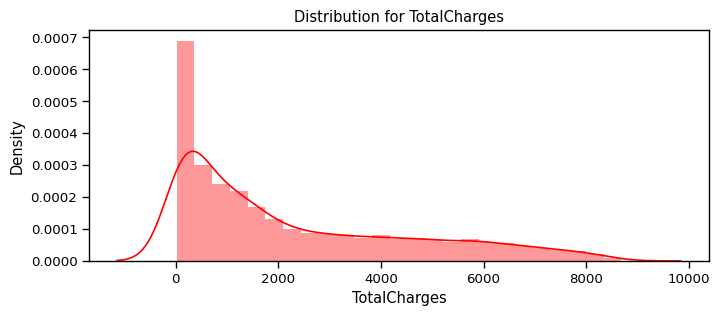

In [52]:
num_cols = ["tenure","MonthlyCharges","TotalCharges"]
for feat in num_cols:
      disptlot(feat,data)

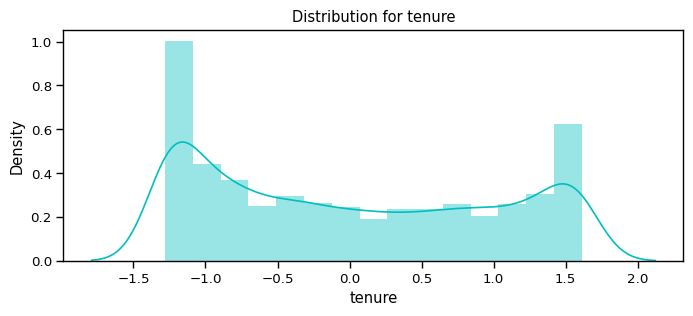

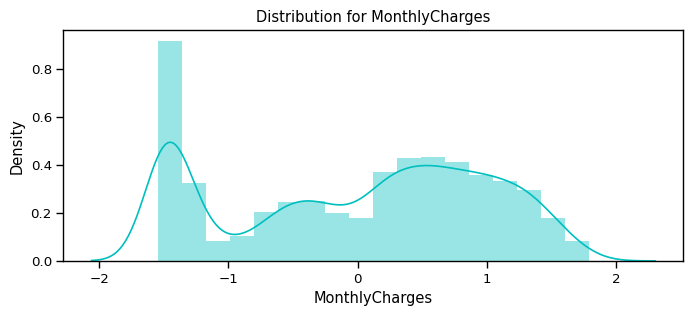

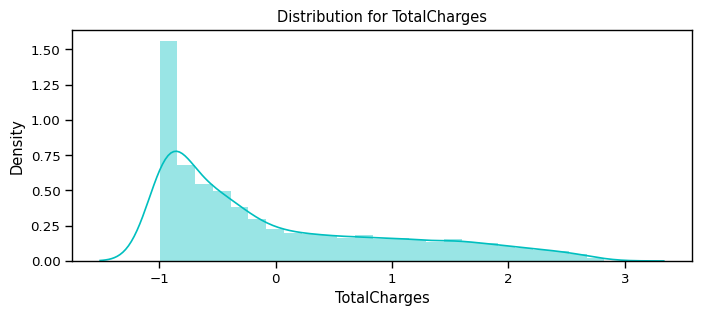

In [53]:
df_std = pd.DataFrame(StandardScaler().fit_transform(data[num_cols].astype('float64')),
                      columns=num_cols)
for feat in numerical_cols:
    disptlot(feat,df_std,color='c')

In [59]:
cat_cols_ohe = ['PaymentMethod','Contract','InternetService']
cat_cols_le = list(set(x_train.columns)-set(num_cols)-set(cat_cols_ohe))

In [60]:
sc = StandardScaler()
x_train[num_cols] = sc.fit_transform(x_train[num_cols])
x_test[num_cols] = sc.transform(x_test[num_cols])

MACHINE LEARNING MODEL EVALUTIONS AND PREDICTIONS

KNN

In [63]:
knn_model = KNeighborsClassifier(n_neighbors=11)
knn_model.fit(x_train,y_train)
predicted_y = knn_model.predict(x_test)
accuracy_knn = knn_model.score(x_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.776303317535545


In [64]:
print(classification_report(y_test,predicted_y))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1549
           1       0.59      0.52      0.55       561

    accuracy                           0.78      2110
   macro avg       0.71      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



SVC

In [65]:
svc_model = SVC(random_state=1)
svc_model.fit(x_train,y_train)
predict_y = svc_model.predict(x_test)
accuracy_svc = svc_model.score(x_test,y_test)
print("SVM accuracy is:",accuracy_svc)

SVM accuracy is: 0.8075829383886256


In [66]:
print(classification_report(y_test,predict_y))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1549
           1       0.69      0.50      0.58       561

    accuracy                           0.81      2110
   macro avg       0.76      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



RANDOM FOREST

In [72]:
model_rf = RandomForestClassifier(n_estimators=500,oob_score=True,n_jobs=-1,random_state=50,max_features=50,max_leaf_nodes=30)
model_rf.fit(x_train,y_train)
prediction_test = model_rf.predict(x_test)
print(metrics.accuracy_score(y_test,prediction_test))

0.8014218009478673


In [73]:
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.65      0.54      0.59       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110



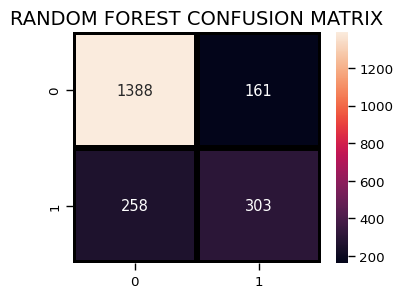

In [75]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,prediction_test),annot=True,fmt="d",linecolor="k",linewidths=3)
plt.title("RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

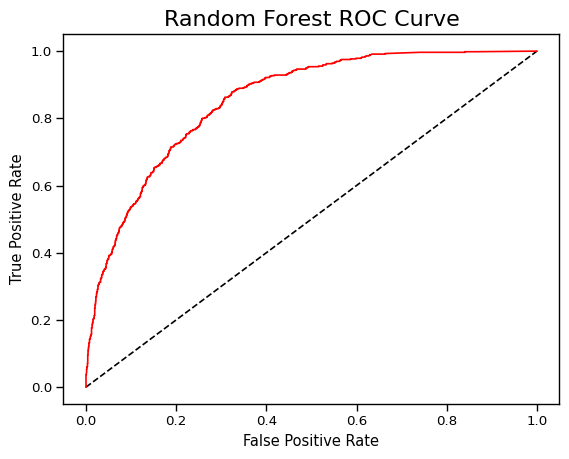

In [77]:
y_rfpred_prob = model_rf.predict_proba(x_test)[:,1]
fpr_rf,tpr_rf,thresholds = roc_curve(y_test,y_rfpred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_rf,tpr_rf,label='Random Forest',color="r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize = 16)
plt.show()

LOGISTIC REGRESSION

In [78]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
accuracy_lr = lr_model.score(x_test,y_test)
print("Logistic Regression Accuracy:",accuracy_lr)

Logistic Regression Accuracy: 0.8090047393364929


In [79]:
lr_pred = lr_model.predict(x_test)
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.66      0.58      0.62       561

    accuracy                           0.81      2110
   macro avg       0.76      0.74      0.75      2110
weighted avg       0.80      0.81      0.80      2110



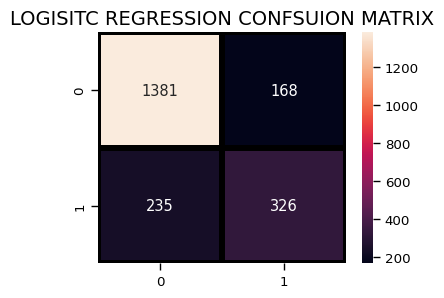

In [80]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,lr_pred),annot=True,fmt="d",linecolor="k",linewidths=3)
plt.title("LOGISITC REGRESSION CONFSUION MATRIX",fontsize=14)
plt.show()

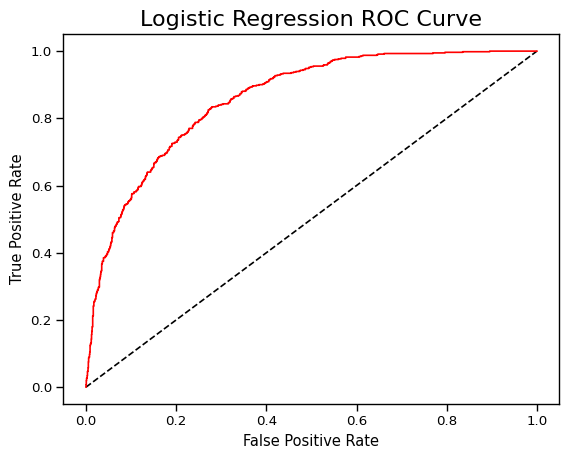

In [81]:
y_pred_prob = lr_model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression',color="r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize = 16)
plt.show()

DECISION TREE CLASSIFIER

In [83]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
predictdt_y = dt_model.predict(x_test)
accuracy_dt = dt_model.score(x_test,y_test)
print("Decision Tree Accuracy is:",accuracy_dt)

Decision Tree Accuracy is: 0.7364928909952607


In [85]:
print(classification_report(y_test,predictdt_y))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1549
           1       0.50      0.53      0.52       561

    accuracy                           0.74      2110
   macro avg       0.67      0.67      0.67      2110
weighted avg       0.74      0.74      0.74      2110



AdaBoost Classifier

In [86]:
a_model = AdaBoostClassifier()
a_model.fit(x_train,y_train)
a_preds = a_model.predict(x_test)
print("AdaBoost Classifier Accuracy")
metrics.accuracy_score(y_test,a_preds)

AdaBoost Classifier Accuracy


0.8075829383886256

In [87]:
print(classification_report(y_test,a_preds))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.67      0.55      0.60       561

    accuracy                           0.81      2110
   macro avg       0.76      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110



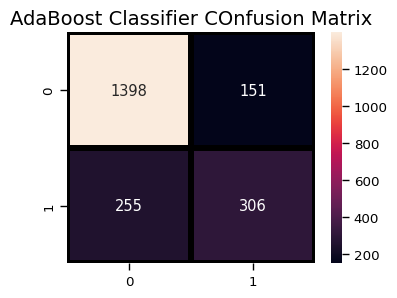

In [89]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,a_preds),annot=True,fmt="d",linecolor="k",linewidths=3)
plt.title("AdaBoost Classifier COnfusion Matrix",fontsize=14)
plt.show()

GRADIENT BOOSTING CLASSIFER

In [90]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
gb_pred = gb.predict(x_test)
print("Gradient Boosting Classifer:",accuracy_score(y_test,gb_pred))

Gradient Boosting Classifer: 0.8075829383886256


In [91]:
print(classification_report(y_test,gb_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.67      0.55      0.60       561

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



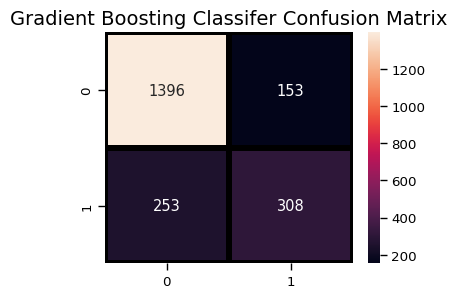

In [92]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,gb_pred),annot=True,fmt="d",linecolor="k",linewidths=3)
plt.title("Gradient Boosting Classifer Confusion Matrix",fontsize=14)
plt.show()

VOTING CLASSIFER

In [93]:
from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc',clf1),('lr',clf2),('abc',clf3)],voting='soft')
eclf1.fit(x_train,y_train)
predictions = eclf1.predict(x_test)
print("Final Accuracy Score")
print(accuracy_score(y_test,predictions))

Final Accuracy Score
0.8165876777251185


In [94]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1549
           1       0.68      0.58      0.63       561

    accuracy                           0.82      2110
   macro avg       0.77      0.74      0.75      2110
weighted avg       0.81      0.82      0.81      2110



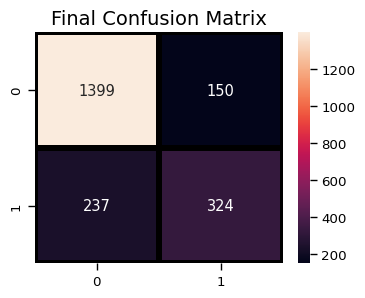

In [95]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt="d",linecolor="k",linewidths=3)
plt.title("Final Confusion Matrix",fontsize=14)
plt.show()

From the confusion matrix we can see that: There are total 1399+150=1549 actual non-churn values and the algorithm predicts 1399 of them as non churn and 150 of them as churn. While there are 237+324=561 actual churn values and the algorithm predicts 237 of them as non churn values and 324 of them as churn values.